In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prateek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### DataSet import and visualization

In [4]:
df = pd.read_csv('C:/Users/prateek/Downloads/SPAM/SMSSpamCollection',sep='\t',encoding = "ISO-8859-1", header=None)
print('Shape of File:- ',df.shape)
df.columns = ["label", "msg"]
df.head()

Shape of File:-  (5572, 2)


,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


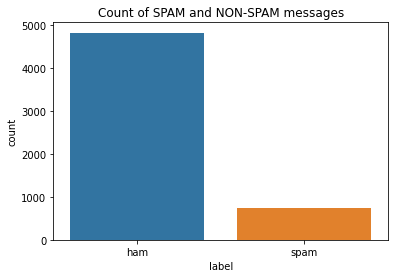

In [5]:
df.groupby('label').describe()
sns.countplot(data = df, x= df["label"]).set_title("Count of SPAM and NON-SPAM messages")
plt.show()

### Word Count Before Preprocessing

In [6]:
from collections import Counter

count1 = Counter(" ".join(df[df['label']=='ham']["msg"]).split()).most_common(10)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of ham", 1 : "count"})
count2 = Counter(" ".join(df[df['label']=='spam']["msg"]).split()).most_common(10)
data2 = pd.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "words of spam", 1 : "count_"})

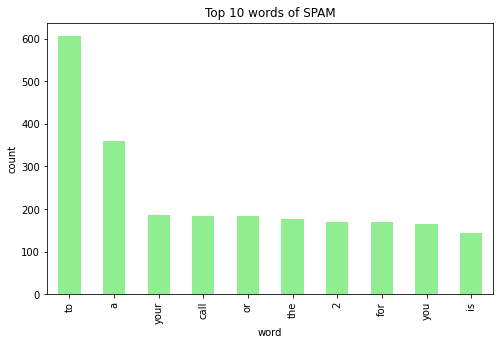

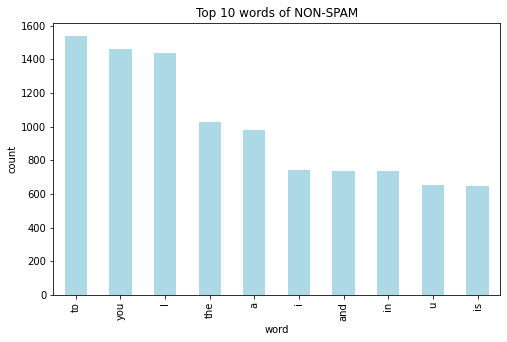

In [7]:
data2.plot.bar(legend = False, color = 'lightgreen', figsize = (8,5))
y_pos = np.arange(len(data2["words of spam"]))
plt.xticks(y_pos, data2["words of spam"])
plt.title('Top 10 words of SPAM')
plt.xlabel('word')
plt.ylabel('count')
plt.show()

data1.plot.bar(legend = False, color = 'lightblue',figsize = (8,5))
y_pos = np.arange(len(data1["words of ham"]))
plt.xticks(y_pos, data1["words of ham"])
plt.title('Top 10 words of NON-SPAM')
plt.xlabel('word')
plt.ylabel('count')
plt.show()


### Data Preprocessing

In [8]:
import string
def data_preprocessing(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    arr = [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    s = ''
    for x in arr:
        s += x +' '
    return s

In [9]:
df['f_msg']=df['msg'].apply(data_preprocessing)
df.head()

,label,msg,f_msg
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [10]:
from collections import Counter

count1 = Counter(" ".join(df[df['label']=='ham']["f_msg"]).split()).most_common(10)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of ham", 1 : "count"})
count2 = Counter(" ".join(df[df['label']=='spam']["f_msg"]).split()).most_common(10)
data2 = pd.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "words of spam", 1 : "count_"})

### Word Count After Preprocessing

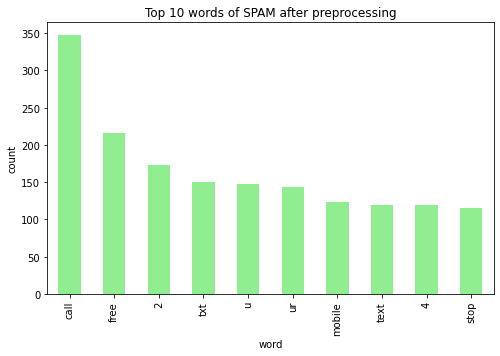

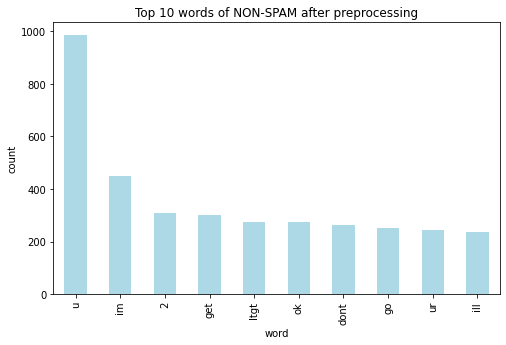

In [11]:
data2.plot.bar(legend = False, color = 'lightgreen', figsize = (8,5))
y_pos = np.arange(len(data2["words of spam"]))
plt.xticks(y_pos, data2["words of spam"])
plt.title('Top 10 words of SPAM after preprocessing')
plt.xlabel('word')
plt.ylabel('count')
plt.show()

data1.plot.bar(legend = False, color = 'lightblue',figsize = (8,5))
y_pos = np.arange(len(data1["words of ham"]))
plt.xticks(y_pos, data1["words of ham"])
plt.title('Top 10 words of NON-SPAM after preprocessing')
plt.xlabel('word')
plt.ylabel('count')
plt.show()


### Test-Train Split

In [12]:
from sklearn.model_selection import train_test_split
total_vocablary_size = 800
msg_label = df['label'].map({'ham': 0, 'spam': 1}).values
X_train, X_test, y_train, y_test = train_test_split(df['f_msg'],msg_label,test_size=0.2)
print(len(X_train),len(X_test))

4457 1115


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = total_vocablary_size)
tokenizer.fit_on_texts(X_train)
X_training = pad_sequences (tokenizer.texts_to_sequences(X_train))
X_testing = pad_sequences(tokenizer.texts_to_sequences(X_test))
epoch_count = 20

## Dense Model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          12800     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 13,233
Trainable params: 13,233
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
140/140 [==============================] - 2s 5ms/step - loss: 0.5087 - accuracy: 0.8620 - val_loss: 0.3344

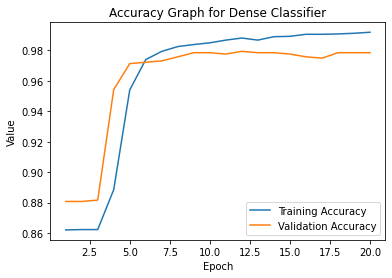

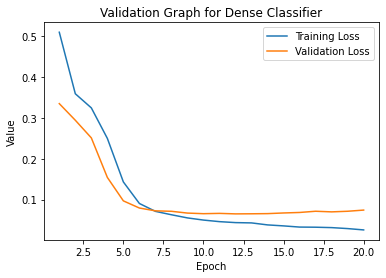

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional
def dense_model():
    dense_model = Sequential()
    dense_model.add(Embedding(total_vocablary_size, 16))
    dense_model.add(GlobalAveragePooling1D())
    dense_model.add(Dense(24, activation='relu'))
    dense_model.add(Dropout(0.1))
    dense_model.add(Dense(1, activation='sigmoid'))
    
    dense_model.summary()
    
    dense_model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])
    
    dense_hist = dense_model.fit(X_training, y_train, epochs=epoch_count, validation_data=(X_testing, y_test))
    
    x = dense_model.evaluate(X_testing, y_test)
    dense_los = x[0]
    dense_acc = x[1]
    print(x)
    print('Loss:- ',x[0])
    print('Accuracy:- ',x[1])
    
    plt.plot(range(1,(epoch_count+1)),dense_hist.history['accuracy'],label='Training Accuracy')
    plt.plot(range(1,(epoch_count+1)),dense_hist.history['val_accuracy'],label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Accuracy Graph for Dense Classifier')
    plt.legend()
    plt.show()
    
    plt.plot(range(1,(epoch_count+1)),dense_hist.history['loss'],label='Training Loss')
    plt.plot(range(1,(epoch_count+1)),dense_hist.history['val_loss'],label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Validation Graph for Dense Classifier')
    plt.legend()
    plt.show()
    
    return dense_model, dense_hist, dense_los, dense_acc

dense_model, dense_hist, dense_los, dense_acc = dense_model()

## LSTM Model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          12800     
_________________________________________________________________
lstm (LSTM)                  (None, None, 20)          2960      
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 20)          3280      
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           21        
Total params: 19,061
Trainable params: 19,061
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
140/140 [==============================] - 20s 79ms/step - loss: 0.4540 - accuracy: 0.8534 - val_loss: 0.3693 - val_accuracy: 0.8818
Epoch 2/20
140/140 [==============================] - 9s 65ms/step - loss: 0.3842 - accuracy: 0.8734 - v

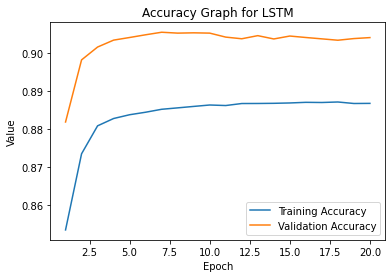

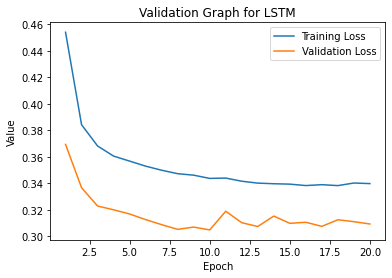

In [15]:
def LSTM_model():
    lstm_model = Sequential()
    lstm_model.add(Embedding(total_vocablary_size, 16))
    lstm_model.add(LSTM(20, dropout=0.1, return_sequences=True))
    lstm_model.add(LSTM(20, dropout=0.1, return_sequences=True))
    lstm_model.add(Dense(1, activation='sigmoid'))
    
    lstm_model.summary()
    
    lstm_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    
    lstm_hist = lstm_model.fit(X_training, y_train, epochs=epoch_count, validation_data=(X_testing, y_test))
    
    x = lstm_model.evaluate(X_testing, y_test)
    lstm_los = x[0]
    lstm_acc = x[1]
    print(x)
    print('Loss of LSTM Model:- ',x[0])
    print('Accuracy of LSTM Model:- ',x[1])
    
    plt.plot(range(1,(epoch_count+1)),lstm_hist.history['accuracy'],label='Training Accuracy')
    plt.plot(range(1,(epoch_count+1)),lstm_hist.history['val_accuracy'],label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Accuracy Graph for LSTM')
    plt.legend()
    plt.show()
    
    plt.plot(range(1,(epoch_count+1)),lstm_hist.history['loss'],label='Training Loss')
    plt.plot(range(1,(epoch_count+1)),lstm_hist.history['val_loss'],label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Validation Graph for LSTM')
    plt.legend()
    plt.show()
    
    return lstm_model, lstm_hist, lstm_los, lstm_acc

lstm_model, lstm_hist, lstm_los, lstm_acc = LSTM_model()

## Bi-directional LSTM Model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          12800     
_________________________________________________________________
bidirectional (Bidirectional (None, None, 40)          5920      
_________________________________________________________________
dense_3 (Dense)              (None, None, 1)           41        
Total params: 18,761
Trainable params: 18,761
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
140/140 [==============================] - 18s 53ms/step - loss: 0.4262 - accuracy: 0.8620 - val_loss: 0.2662 - val_accuracy: 0.8815
Epoch 2/20
140/140 [==============================] - 5s 34ms/step - loss: 0.1536 - accuracy: 0.9501 - val_loss: 0.1217 - val_accuracy: 0.9740
Epoch 3/20
140/140 [==============================] - 5s 35ms/step - loss: 0.0891 - accuracy:

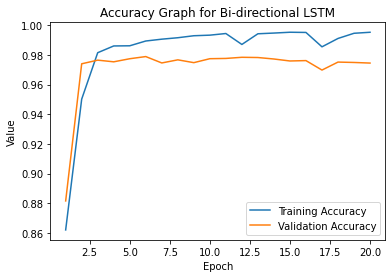

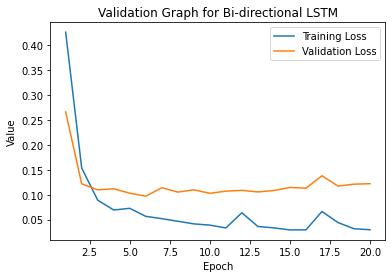

In [16]:
def BILSTM_model():
    bilstm_model = Sequential()
    bilstm_model.add(Embedding(total_vocablary_size, 16))
    bilstm_model.add(Bidirectional(LSTM(20, dropout=0.1, return_sequences=True)))
    bilstm_model.add(Dense(1, activation='sigmoid'))
    
    bilstm_model.summary()
    
    bilstm_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    
    bilstm_hist = bilstm_model.fit(X_training, y_train, epochs=epoch_count, validation_data=(X_testing, y_test))
    
    x = bilstm_model.evaluate(X_testing, y_test)
    bilstm_los = x[0]
    bilstm_acc = x[1]
    print(x)
    print('Loss of Bi-directional LSTM:- ',x[0])
    print('Accuracy of Bi-directional LSTM:- ',x[1])
    
    plt.plot(range(1,(epoch_count+1)),bilstm_hist.history['accuracy'],label='Training Accuracy')
    plt.plot(range(1,(epoch_count+1)),bilstm_hist.history['val_accuracy'],label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Accuracy Graph for Bi-directional LSTM')
    plt.legend()
    plt.show()
    
    plt.plot(range(1,(epoch_count+1)),bilstm_hist.history['loss'],label='Training Loss')
    plt.plot(range(1,(epoch_count+1)),bilstm_hist.history['val_loss'],label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Validation Graph for Bi-directional LSTM')
    plt.legend()
    plt.show()
    
    return bilstm_model, bilstm_hist, bilstm_los, bilstm_acc

bilstm_model, bilstm_hist, bilstm_los, bilstm_acc = BILSTM_model()

In [17]:
dl_acc_list = [dense_acc, lstm_acc, bilstm_acc]
name_dl_acc_list = ['Dense', 'LSTM', "Bi-directional LSTM"]
print(dl_acc_list,name_dl_acc_list)

[0.9784753322601318, 0.9040359258651733, 0.9744522571563721] ['Dense', 'LSTM', 'Bi-directional LSTM']


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df['f_msg'],df['label'],test_size=0.2)
print(len(X_train),len(X_test))

4457 1115


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(X_train)
X_training = cv.transform(X_train)
X_testing = cv.transform(X_test)

## Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

def naive_bayes():
    value_of_alpha = [0.1 ,0.2, 0.3, 0.5 ,1, 1.25, 1.5]
    acc_with_alpha = []
    for a in value_of_alpha:
        mnb = MultinomialNB(alpha = a)
        mnb.fit(X_training,y_train)

        y_mnb = mnb.predict(X_testing)

        acc_with_alpha.append(accuracy_score( y_mnb , y_test))
    
    plt.plot(value_of_alpha,acc_with_alpha,label='Naive Bayes') # plot for score of model
    plt.xlabel('Value of alpha')
    plt.ylabel('Accuracy of model')
    plt.title("Accuracy Graph for Naive Bayes with different alpha value")
    plt.legend()
    plt.show()    
    return max(acc_with_alpha), acc_with_alpha


## SVM

In [21]:
from sklearn.svm import SVC
def SVM_model():
    kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
    value_of_c = [0.1 ,0.5 ,1, 1.25, 1.5, 1.75, 2]
    acc_list = []
    for ker in kernel_list:
        score_of_model = []
        for c in value_of_c:
            svc = SVC(C=c, kernel=ker)
            svc.fit(X_training,y_train)
            y_svc = svc.predict(X_testing)

            SVM_model_accuracy = accuracy_score( y_svc , y_test)
            score_of_model.append(SVM_model_accuracy)
        plt.plot(value_of_c,score_of_model,label=ker) # plot for score of model
        acc_list.append(max(score_of_model))
    plt.xlabel('Value of c')
    plt.ylabel('Accuracy of model')
    plt.title("Accuracy Graph for SVM with different C value")
    plt.legend()
    plt.show()    
    
    return max(acc_list), acc_list

## KNeighbors Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
def KNeighborsClassifier_model():
    weights_list = ['uniform', 'distance']
    value_of_neighbors = [i for i in range(1,11)]
    
    acc_list = []
    for we in weights_list:
        score_of_model = []
        for neigh in value_of_neighbors:
            knc = KNeighborsClassifier(n_neighbors=neigh, algorithm='auto', weights = we)
            knc.fit(X_training,y_train)
            y_knc = knc.predict(X_testing)
            
            KNeighborsClassifier_model_accuracy = accuracy_score( y_knc , y_test)
            score_of_model.append(KNeighborsClassifier_model_accuracy)
        plt.plot(value_of_neighbors,score_of_model,label=we) # plot for score of model
        acc_list.append(max(score_of_model))
    plt.xlabel('Value of Neighbors')
    plt.ylabel('Accuracy of model')
    plt.title("Accuracy Graph for KNeighborsClassifier\n with different Neighbors value")
    plt.legend()
    plt.show()    
    
    return max(acc_list), acc_list

## Decision Tree Classifier 

In [23]:
from sklearn.tree import DecisionTreeClassifier

def DecisionTreeClassifier_model():
    # dtc = DecisionTreeClassifier(min_samples_split=7, random_state=252)
    splitter_list = ['best', 'random']
    min_samples_split_list = [i for i in range(2,20,2)]
    
    acc_list = []
    for sp in splitter_list:
        score_of_model = []
        for mss in min_samples_split_list:
            dtc = DecisionTreeClassifier(min_samples_split = mss ,splitter=sp)
            dtc.fit(X_training,y_train)
            y_dtc = dtc.predict(X_testing)
            
            DecisionTreeClassifier_model_accuracy = accuracy_score( y_dtc , y_test)
            score_of_model.append(DecisionTreeClassifier_model_accuracy)
        plt.plot(min_samples_split_list,score_of_model,label=sp) # plot for score of model
        acc_list.append(max(score_of_model))
    plt.xlabel('Value of min_samples_split')
    plt.ylabel('Accuracy of model')
    plt.title("Accuracy Graph for DecisionTreeClassifier\n with different min_samples_split")
    plt.legend()
    plt.show()    
    
    return max(acc_list), acc_list

## Extra Trees Classifier

In [24]:
from sklearn.ensemble import ExtraTreesClassifier

def ExtraTreesClassifier_model():
    criterion_list = ['gini', 'entropy']
    n_estimators_list = [i for i in range(10,110,10)]
    
    acc_list = []
    for cr in criterion_list:
        score_of_model = []
        for nest in n_estimators_list:
            etc = ExtraTreesClassifier(n_estimators = nest, criterion = cr)
            etc.fit(X_training,y_train)
            y_etc = etc.predict(X_testing)
            
            ExtraTreesClassifier_model_accuracy = accuracy_score( y_etc , y_test)
            score_of_model.append(ExtraTreesClassifier_model_accuracy)
            
        plt.plot(n_estimators_list,score_of_model,label=cr) # plot for score of model
        acc_list.append(max(score_of_model))
    plt.xlabel('Value of n_estimators')
    plt.ylabel('Accuracy of model')
    plt.title("Accuracy Graph for ExtraTreesClassifier\n with different n_estimators")
    plt.legend()
    plt.show()    
    
    return max(acc_list), acc_list

## Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

def RandomForestClassifier_model():
    criterion_list = ['gini', 'entropy']
    n_estimators_list = [i for i in range(10,110,10)]
    
    acc_list = []
    for cr in criterion_list:
        score_of_model = []
        for nest in n_estimators_list:
            rfc = RandomForestClassifier(n_estimators = nest, criterion = cr)
            rfc.fit(X_training,y_train)
            y_rfc = rfc.predict(X_testing)
            
            RandomForestClassifier_model_accuracy = accuracy_score( y_rfc , y_test)
            score_of_model.append(RandomForestClassifier_model_accuracy)
            
        plt.plot(n_estimators_list,score_of_model,label=cr) # plot for score of model
        acc_list.append(max(score_of_model))
    plt.xlabel('Value of n_estimators')
    plt.ylabel('Accuracy of model')
    plt.title("Accuracy Graph for RandomForestClassifier\n with different n_estimators")
    plt.legend()
    plt.show()    
    
    return max(acc_list), acc_list

## AdaBoost Classifier

In [26]:
from sklearn.ensemble import AdaBoostClassifier

def AdaBoostClassifier_model():
    algorithm_list = ['SAMME', 'SAMME.R']
    n_estimators_list = [i for i in range(10,110,10)]
    
    acc_list = []
    for alg in algorithm_list:
        score_of_model = []
        for nest in n_estimators_list:
            abc = AdaBoostClassifier(n_estimators = nest, algorithm = alg)
            abc.fit(X_training,y_train)
            y_abc = abc.predict(X_testing)
            
            AdaBoostClassifier_model_accuracy = accuracy_score( y_abc , y_test)
            score_of_model.append(AdaBoostClassifier_model_accuracy)
            
        plt.plot(n_estimators_list,score_of_model,label=alg) # plot for score of model
        acc_list.append(max(score_of_model))
    plt.xlabel('Value of n_estimators')
    plt.ylabel('Accuracy of model')
    plt.title("Accuracy Graph for AdaBoostClassifier\n with different n_estimators")
    plt.legend()
    plt.show()    
    
    return max(acc_list), acc_list

## Bagging Classifier

In [27]:
from sklearn.ensemble import BaggingClassifier

def BaggingClassifier_model():
    algorithm_list = [SVC(), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier(), AdaBoostClassifier(), ExtraTreesClassifier()]
    n_estimators_list = [i for i in range(10,110,10)]
    
    acc_list = []
    for alg in algorithm_list:
        score_of_model = []
        for nest in n_estimators_list:
#             print(alg,nest, end = ' ')
            bc = BaggingClassifier(base_estimator = alg ,n_estimators = nest)
            bc.fit(X_training,y_train)
            y_bc = bc.predict(X_testing)
            
            BaggingClassifier_model_accuracy = accuracy_score( y_bc , y_test)
            score_of_model.append(BaggingClassifier_model_accuracy)
            
        plt.plot(n_estimators_list,score_of_model,label=alg) # plot for score of model
        acc_list.append(max(score_of_model))
    print()
    plt.xlabel('Value of n_estimators')
    plt.ylabel('Accuracy of model')
    plt.title("Accuracy Graph for BaggingClassifier\n with different n_estimators")
    plt.legend()
    plt.show()    
    
    return max(acc_list), acc_list

### Function calling to all the Classifiers

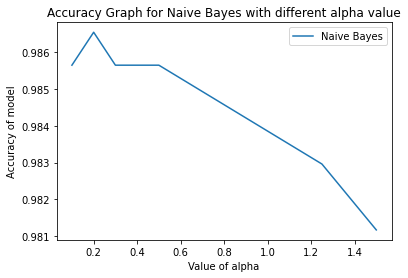

Accuracy of Naive Bayes :-  0.9865470852017937

---------------------------------------------------



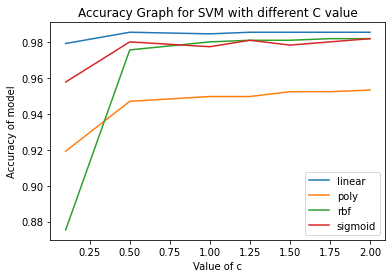

Accuracy of SVM :-  0.9856502242152466

---------------------------------------------------



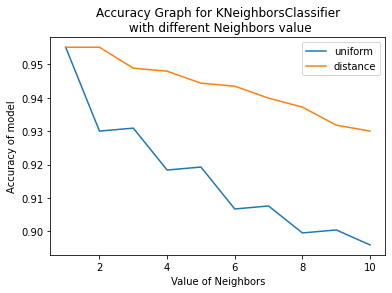

Accuracy of KNeighborsClassifier :-  0.9551569506726457

---------------------------------------------------



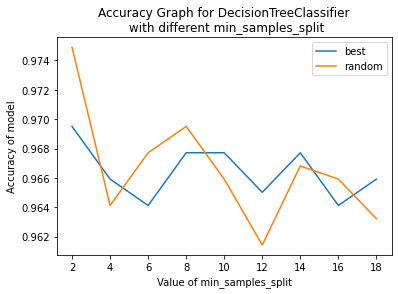

Accuracy of DecisionTreeClassifier :-  0.9748878923766816

---------------------------------------------------



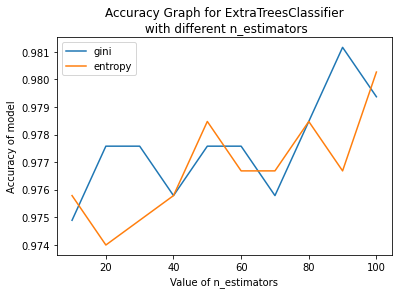

Accuracy of ExtraTreesClassifier :-  0.9811659192825112

---------------------------------------------------



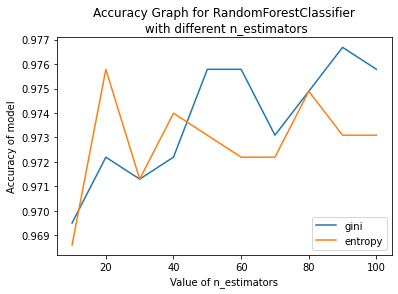

Accuracy of RandomForestClassifier :-  0.9766816143497757

---------------------------------------------------



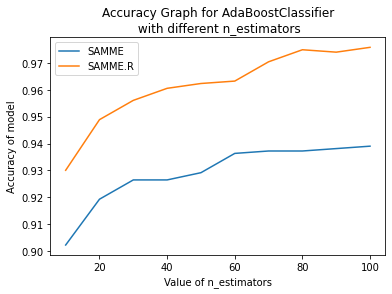

Accuracy of AdaBoostClassifier :-  0.9757847533632287

---------------------------------------------------




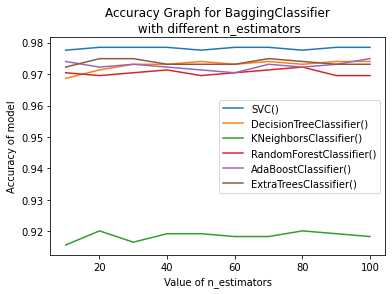

Accuracy of BaggingClassifier :-  0.97847533632287

---------------------------------------------------



In [28]:
def function_calling():
    naive_bayes_accuracy, naive_bayes_acc_with_alpha = naive_bayes()
    print('Accuracy of Naive Bayes :- ', naive_bayes_accuracy)
    print('\n---------------------------------------------------\n')
    
    SVM_model_accuracy, SVM_model_acc_list = SVM_model()
    print('Accuracy of SVM :- ',SVM_model_accuracy)
    print('\n---------------------------------------------------\n')
    
    KNeighborsClassifier_accuracy, KNeighborsClassifier_model_acc_list = KNeighborsClassifier_model()
    print('Accuracy of KNeighborsClassifier :- ',KNeighborsClassifier_accuracy)
    print('\n---------------------------------------------------\n')
    
    DecisionTreeClassifier_accuracy, DecisionTreeClassifier_acc_list = DecisionTreeClassifier_model()
    print('Accuracy of DecisionTreeClassifier :- ',DecisionTreeClassifier_accuracy )
    print('\n---------------------------------------------------\n')
    
    ExtraTreesClassifier_accuracy, ExtraTreesClassifier_acc_list = ExtraTreesClassifier_model()
    print('Accuracy of ExtraTreesClassifier :- ',ExtraTreesClassifier_accuracy )
    print('\n---------------------------------------------------\n')
    
    RandomForestClassifier_accuracy, RandomForestClassifier_acc_list = RandomForestClassifier_model()
    print('Accuracy of RandomForestClassifier :- ',RandomForestClassifier_accuracy )
    print('\n---------------------------------------------------\n')
    
    AdaBoostClassifier_accuracy, AdaBoostClassifier_acc_list = AdaBoostClassifier_model()
    print('Accuracy of AdaBoostClassifier :- ',AdaBoostClassifier_accuracy )
    print('\n---------------------------------------------------\n')
    
    BaggingClassifier_accuracy, BaggingClassifier_acc_list = BaggingClassifier_model()
    print('Accuracy of BaggingClassifier :- ',BaggingClassifier_accuracy )
    print('\n---------------------------------------------------\n')
    
    acc_list_all = [naive_bayes_accuracy, SVM_model_accuracy, KNeighborsClassifier_accuracy, DecisionTreeClassifier_accuracy, 
                    ExtraTreesClassifier_accuracy, RandomForestClassifier_accuracy, AdaBoostClassifier_accuracy, BaggingClassifier_accuracy]
    name_acc_list_all = ['Naive Bayes', 'SVM', 'KNeighbors Classifier', 'Decision Tree Classifier', 
                    'Extra Trees Classifier', 'Random Forest Classifier', 'AdaBoost Classifier', 'Bagging Classifier']

    return acc_list_all, name_acc_list_all
    
acc_list_all, name_acc_list_all = function_calling()

In [29]:
final_accuracy_list, name_final_accuracy_list = [], []
for x in name_dl_acc_list:
    name_final_accuracy_list.append(x)
for x in dl_acc_list:
    final_accuracy_list.append(x)

for x in name_acc_list_all:
    name_final_accuracy_list.append(x)
for x in acc_list_all:
    final_accuracy_list.append(x)

final_accuracy_list, name_final_accuracy_list = zip(*sorted(zip(final_accuracy_list, name_final_accuracy_list)))
# print(final_accuracy_list)
# print(name_final_accuracy_list)

# Final Comparison

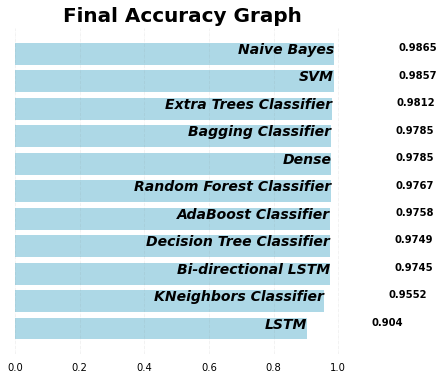

In [30]:
fig, ax = plt.subplots(figsize =(6, 6))
ax.barh(name_final_accuracy_list, final_accuracy_list, color = 'lightblue')

for i, (value, name) in enumerate(zip(final_accuracy_list, name_final_accuracy_list )):
    ax.text(value, i,     name, ha='right', fontweight ='bold', size=14, fontstyle = 'italic', color = 'black')
    
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
ax.set_yticks([])

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 4)),
             fontsize = 10, fontweight ='bold',
             color ='black')
 
ax.set_title('Final Accuracy Graph', loc ='center', fontweight ='bold',fontsize = 20)
plt.show()